# Taller de morfología matemática y segmentación (básica)

Miguel Gutierrez y Felipe Guzman

In [47]:
# Imports 
import skimage
from skimage import feature
from skimage import io
from os.path import join
import scipy
import numpy as np
from skimage import morphology
from skimage.filters import threshold_multiotsu
from skimage.color import label2rgb
from skimage import util
from skimage import segmentation
import matplotlib.pyplot as plt
import scipy.ndimage

## 1. Practicando morfología matemática 

Para estos ejercicios sencillos se usará la librería de [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html) o la más específica (y recomendable) [`skimage.morphology`](https://scikit-image.org/docs/dev/api/skimage.morphology.html). Recuerda `skimage` se base en muchos de sus algoritmos en `ndimage`. 

En las operaciones de morfología matemática es importante definir un elemento estructural. En [esta lectura](https://scikit-image.org/docs/dev/auto_examples/numpy_operations/plot_structuring_elements.html#sphx-glr-auto-examples-numpy-operations-plot-structuring-elements-py) se encuentra como definir diversos elementos estructurales en 2D y 3D de diferentes formas y tamaños.

Para practicar algunas operaciones básicas leeremos la imagen `glimage.gif` y realizaremos diversas operaciones. También usaremos la siguiente función para graficar la imagen original y la imagen filtrada: 

In [2]:
def plot_comparison(original, filtered, filter_name):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(filter_name)
  ax2.axis('off')
  return

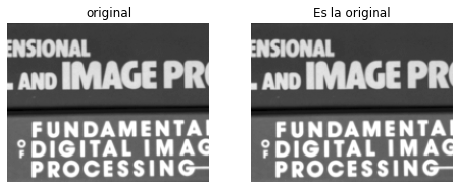

In [3]:
DIR = "images" 
I = io.imread(join(DIR, "glimage.gif"))
plot_comparison(I, I, "Es la original")

### 1.1 Segmente las letras mediante umbralización manual
Grafique el histograma y manualmente seleccione un umbral. A continuación seleccione los pixeles de la imagen superiores a ese valor para producir una imagen binaria que contenga sólo las letras. Muestre el resultado y comparelo con la imagen original.

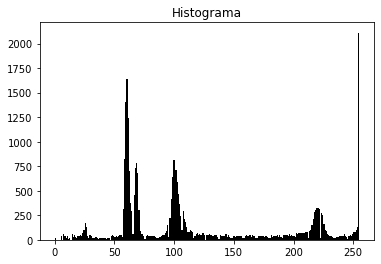

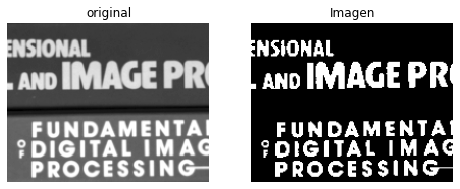

In [4]:
plt.hist(I.flatten(),bins=255,color='black')
plt.title("Histograma")
plt.show()

I2 = I>200
plot_comparison(I,I2,'Imagen')

### 1.2 Defina elementos estructurales y realize diversas operaciones de morfología, explique los resultados.

Defina dos tipos de elementos estructurales en 2D (disco, cuadrado, diamante, etc.) de tamaño pequeño para retocar las letras ( por ejemplo 2x2, 3x3, de acuerdo al tamaño de la imagen). 

Realice las siguientes operaciones sobre la imagen binaria generada y explique cada uno de los resultados para los elementos estructurales definidos ( no olvide graficar la imagen original vs la imagen filtrada):

- dilate
- erosion
- opening
- closing


## Dilatacion

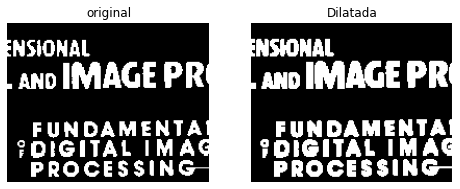

In [5]:
disco = morphology.disk(2)
cuadrado = morphology.square(2)

I_dilatada = morphology.dilation(I2, cuadrado)
plot_comparison(I2,I_dilatada,'Dilatada')

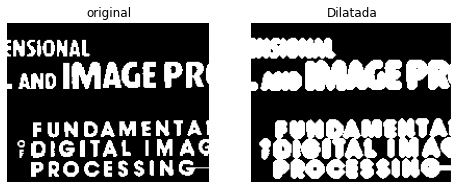

In [6]:
I_dilatada = morphology.dilation(I2, disco)
plot_comparison(I2,I_dilatada,'Dilatada')

## Erosión

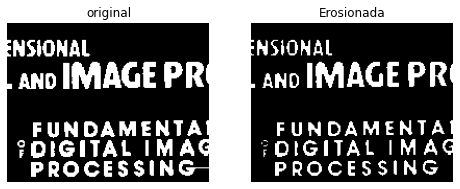

In [7]:
I_erosion = morphology.erosion(I2, cuadrado)
plot_comparison(I2,I_erosion,'Erosionada')

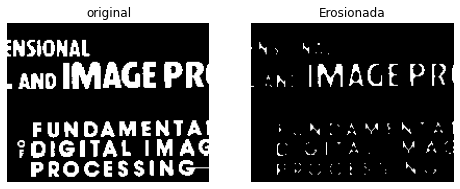

In [8]:
I_erosion = morphology.erosion(I2, disco)
plot_comparison(I2,I_erosion,'Erosionada')

## Opening

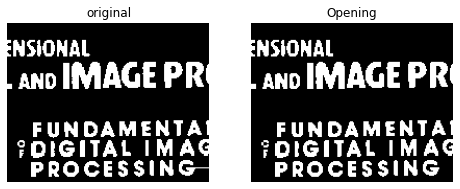

In [9]:
I_opening = morphology.opening(I2, cuadrado)
plot_comparison(I2,I_opening,'Opening')

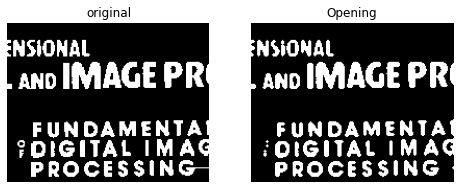

In [10]:
disco = morphology.disk(1)
I_opening = morphology.opening(I2, disco)
plot_comparison(I2,I_opening,'Opening')

## Closing

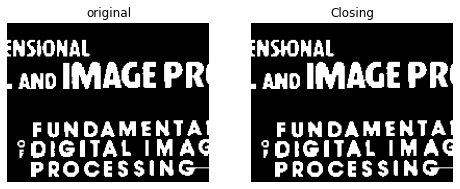

In [11]:
I_closing = morphology.closing(I2, cuadrado)
plot_comparison(I2,I_closing,'Closing')

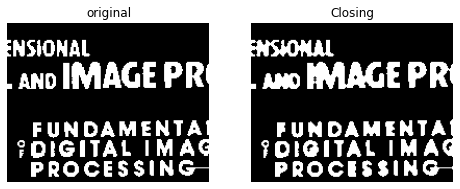

In [12]:
I_closing = morphology.closing(I2, disco)
plot_comparison(I2,I_closing,'Closing')

### 1.3 The hit or miss transform


The hit or miss transform permite derivar información sobre cómo los objetos en una imagen binaria se relacionan con su entorno. La operación requiere un par de elementos estructurantes, {s1, s2}, que sondean el interior y el exterior, respectivamente, de los objetos de la imagen:
$$
f \circledast\left\{s_{1}, s_{2}\right\}=\left(f \ominus {s_{1}}\right) \cap\left(f^{c} \ominus {s_{2}}\right)
$$

Un píxel que pertenece a un objeto se conserva mediante the hit or miss transform si y solo si s1 trasladado a ese píxel encaja dentro del objeto Y s2 trasladado a ese píxel encaja fuera del objeto. Se supone que s1 y s2 no se intersectan, de lo contrario sería imposible que ambos ajustes ocurrieran simultáneamente.
Es más fácil describirlo considerando s1 y s2 como un solo elemento estructural con 1s para píxeles de s1 y 0s para píxeles de s2; en este caso, the hit or miss transform asigna 1 a un píxel de salida solo si el objeto (con el valor de 1) y el fondo (con el valor de 0) píxeles en el elemento estructural coinciden exactamente con el objeto (1) y el fondo (0) en la imagen de entrada. De lo contrario, ese píxel se establece en el valor de fondo (0).

the hit or miss transform se puede utilizar para detectar formas específicas (disposiciones espaciales de objetos y valores de píxeles de fondo) si los dos elementos estructurantes presentan la forma deseada, así como para adelgazar o engrosar los elementos lineales del objeto.

#### Cree una función que implemente the hit or miss transform y realice la transformada sobre la imagen binaria de las letras utilizando un elemento estructural rectangular de tamaño 2x5 (y su complemento como segunda estructura). Visualice los resultados.

#### Repita el ejercicio usando `scipy.ndimage.binary_hit_or_miss`.

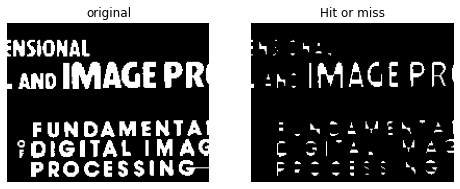

In [13]:
rect = morphology.rectangle(2,5)

# Creamos la funcin hit_miss
def hit_miss(I,rect):
  Imgc =util.invert(I) # es util utilizar este codigo en vez de restar 1- la imagen
  rect_c = util.invert(rect)
  I1 = morphology.erosion(I,rect)
  Ic = morphology.erosion(Imgc,rect_c)
  If = I1 & I2
  return If

I_hit_miss = hit_miss(I2,rect)
plot_comparison(I2,I_hit_miss,"Hit or miss")

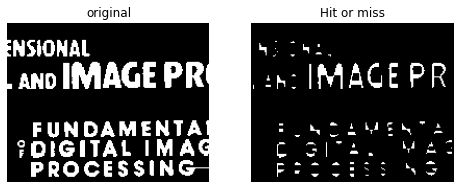

In [14]:
I_hit_miss = scipy.ndimage.binary_hit_or_miss(I2,rect)
plot_comparison(I2,I_hit_miss,"Hit or miss")

### 1.4 Reconstrucción morfológica


La reconstrucción morfológica por dilatación es similar a la dilatación morfológica básica: los valores de alta intensidad reemplazarán a los valores cercanos de baja intensidad. Sin embargo, el operador de dilatación básico utiliza un elemento de estructuración para determinar qué tan lejos puede extenderse un valor en la imagen de entrada. Por el contrario, la reconstrucción utiliza dos imágenes: una imagen de "semilla" (seed or marker image), que especifica los valores que se propagan, y una imagen de "máscara" (mask), que da el valor máximo permitido en cada píxel. La imagen de la máscara, al igual que el elemento estructural, limita la difusión de valores de alta intensidad. La reconstrucción por erosión es simplemente lo contrario: los valores de baja intensidad se extienden desde la imagen de la semilla y están limitados por la imagen de la máscara, que representa el valor mínimo permitido.

Alternativamente, puede pensar en la reconstrucción como una forma de aislar las regiones conectadas de una imagen. Para la dilatación, la reconstrucción conecta las regiones marcadas por máximos locales en la imagen de la semilla: los píxeles vecinos menores o iguales a esas semillas están conectados a la región sembrada. Los máximos locales con valores mayores que la imagen inicial se truncarán al valor inicial.

Para el siguiente ejercicio usaremos `skimage.morphology.reconstruction`

#### Extraiga la letra F
En este punto extraerá la letra F usando reconstrucción morfológica mediante opening aplicada a imágenes binarias. 

- Use la imagen binaria de las letras, obtenida anteriormente, y utilicela como imagen máscara (mask). Cree una semilla (seed o marker image) al ubicar al menos un punto de la  imagen sobre la letra "f" (una imagen de Falses excepto en el punto). Utilice `morphology.reconstruction` con la semilla y máscara anteriores. Visualice el resultado. 

- Explique porqué logra extraer la imagen con la reconstrucción.

- Realice el mismo procedimiento pero usango la imagen de escala de grises original y una semilla más grande (cuadrado o disco de 5x5). Visualice los resultados.

- Extraiga ahora tres letras separas utilizando el procedimiento de reconstrucción morfolófica (y tal vez alguna operación adicional). 


Primero determinamos un punto dentro del intervalo donde aparece la f

Hacemos una mascara para dilatacion y erosion

In [15]:
I2[96,33]

False

(153, 195)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


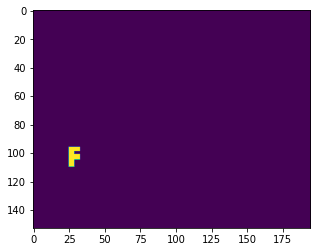

In [16]:
# a)
print(I2.shape)
sem = np.zeros(I2.shape) #mascara dilatacion
sem2 = np.ones(I2.shape) # mascara erosion
sem2[80,25]=0
sem[97,30] = 1
print(sem)
#F = I2[90:110,20:40]
#plt.imshow(F)
reconst_f = morphology.reconstruction(sem,I2,method='dilation')
plt.imshow(reconst_f)

Miramos tambien el caso de erosion

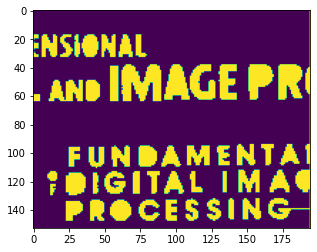

In [17]:
reconst = morphology.reconstruction(sem2,I2,method='erosion')
plt.imshow(reconst)

b) Lo que sucede es que la reconstrucción toma el valor de la semilla y mira si es mayor o menor a la mascara. Si el valor de la semilla es menor a la mascara hace erosion y si es mayor hace dilatación, esto dependiendo si uno le pasa metodo dilatación o erosión. Luego escoge la semilla y la va expandiendo tanto la intensidad de su frontera sea similar hasta que encuentre un cambio brusco de intensidad, lo compara con la mascara y si es una intesidad baja, para.

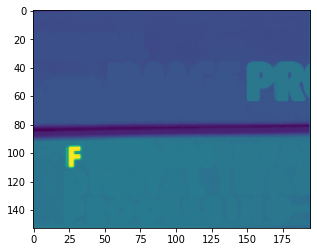

In [18]:
#c) 
sem = np.zeros(I2.shape)
# Hacemos un cuadrado 5x5
#sem[97,30] = 1

sem[96:98,30:32] = I[96:98,30:32]

reconst = morphology.reconstruction(sem,I)
plt.imshow(reconst)


(153, 195)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


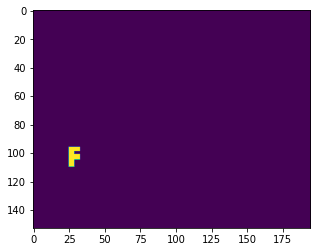

In [19]:
# a)
print(I2.shape)
sem = np.zeros(I2.shape) #mascara dilatacion
sem2 = np.ones(I2.shape) # mascara erosion
sem2[80,25]=0
sem[97,30] = 1
print(sem)
#F = I2[90:110,20:40]
#plt.imshow(F)
reconst = morphology.reconstruction(sem,I2,method='dilation')
plt.imshow(reconst)

Utilizamos la misma intensidad de la imagen original en el intervalo 96:98,30:32 para que idfentificar correctamente la forma e intensidad de F

Ahora aplicamos lo mismo a diferentes palabras

(153, 195)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


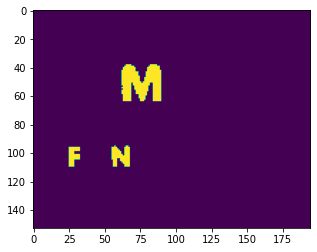

In [20]:
# a)
print(I2.shape)
sem = np.zeros(I2.shape) #mascara dilatacion
sem[97,30] = 1
sem[60,75] = 1
sem[100,60] = 1
print(sem)
reconst_tres = morphology.reconstruction(sem,I2,method='dilation')
plt.imshow(reconst_tres)

### 1.5 Convex hull y esqueleto
Determine el [convex hull](skimage.morphology.convex_hull_image) y el [esqueleto](skimage.morphology.skeletonize) de la imagen binaria que contiene sólo a la "f". Visualice los resultados (haciendo un zoom).

Repita el procedimiento anterior para la imagen que contiene las tres letras.

Extraiga los componentes conectados de la imagen de tres letras usando `skimage.morphology.label`. Visualice el resultado

Agregamos el proceso a la F

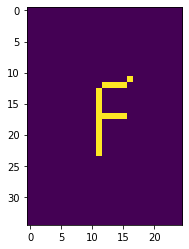

In [21]:
convex_hull = morphology.convex_hull.convex_hull_image(reconst_f)
skeletal = morphology.skeletonize(reconst_f)
plt.imshow(skeletal[85:120,15:40])
#plt.imshow(convex_hull)

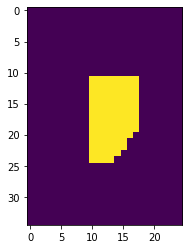

In [22]:
plt.imshow(convex_hull[85:120,15:40])


Ahora a las tres letras

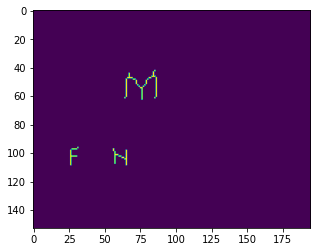

In [23]:
convex_hull = morphology.convex_hull.convex_hull_image(reconst_tres)
skeletal = morphology.skeletonize(reconst_tres)
plt.imshow(skeletal)


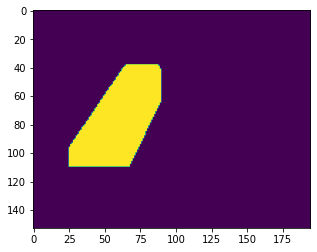

In [24]:
plt.imshow(convex_hull)

## 2. Obteniendo el gradiente y comparandolo con el gradiente morfológico

Use los filtros sobel (ver diapositiva 19, clase pasada) y `scipy.ndimage.convolve` para calcular las aproximaciones de derivadas horizontales y verticales (grafiquelas) y posteriormente determine la magnitud del gradiente (aproximandola como la suma de los valores absolutos), sobre la imagen de las letras. Recuerde que puede utilizar filtrados pasabajos para mejorar los resultados (si desea).

- Detecte los bordes mediante umbralización del gradiente.

- Detecte los bordes calculando el Laplaciano, usando `skimage.filters.laplace`

- Detecte los bordes usando el método de canny, mediante `skimage.feature.canny`. (pruebe diferentes sigmas). 

- Visualice los resultados anteriores y comparelos. 

In [25]:
from skimage import filters

In [26]:
fI_s1 = filters.sobel_h(I2)
fI_s2 = filters.sobel_v(I2)

In [27]:
G = np.sqrt(np.square(fI_s1)+np.square(fI_s2))


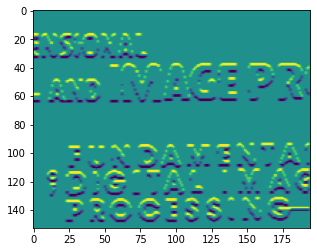

In [28]:
plt.imshow(fI_s1)

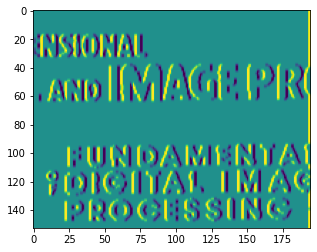

In [29]:
plt.imshow(fI_s2)

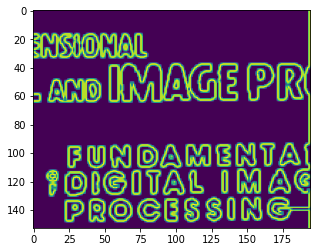

In [30]:
plt.imshow(G)

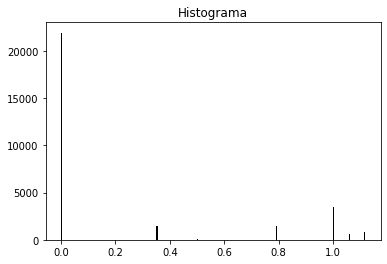

In [31]:
plt.hist(G.flatten(), bins=255, color='black')
plt.title("Histograma")
plt.show()

Umbralizacion del gradiente

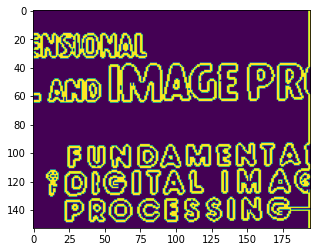

In [32]:
G2 = G>0.5
plt.imshow(G2)

Laplaciano

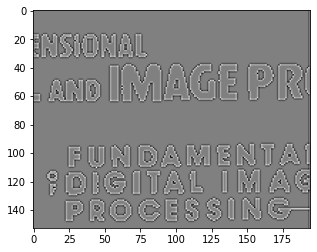

In [33]:
Ilapalce = filters.laplace(I2)
plt.imshow(Ilapalce,cmap='gray')

Canny

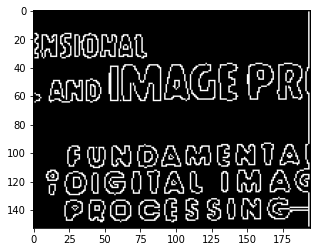

In [34]:
Icanny = feature.canny(I2,1)
plt.imshow(Icanny,cmap='gray')

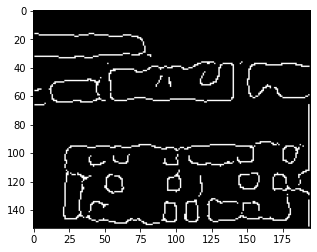

In [35]:
Icanny = feature.canny(I2,5)
plt.imshow(Icanny,cmap='gray')

Si es muy grande se deforman muchos los bordes de la imagen. Todas las imagens anteriors detectan los bordes, sin embargo unos mucho mejores que otros. El mejor es canny con un valor pequeño


## 3. Segmentando la hemoglobina de los glóbulos rojos  usando  umbralización y morfología matemática

En este punto, tiene que extraer la zona pálida de los glóbulos rojos (la parte central pálida). Para ello utilizará la combinación de umbralización (automática y manual) y morfología matemática para depurar y/o seleccionar partes de la imagen. 

La imagen a utilizar es la siguiente:

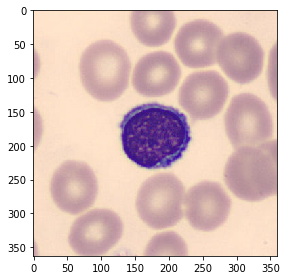

In [36]:
img = io.imread(join(DIR, "linfo.jpg"))
io.imshow(img);

Esta imagen está compuesta por varias partes: el fondo (plasma sanguíneo), los glóbulos rojos o hematíes (que tienen una zona pálida en el centro), el linfocito en la parte central (compuesto por nucleo y citoplasma). 

Grafique el histograma de la componente verde de la imagen y observe cuantas regiones o modas (umbrales +1 ) hay. Utilice `skimage.filters.threshold_multiotsu` para segmentar las regiones (para digitalizar la imagen a partir de los umbrales le será útil `np.digitize`). 

El procedimiento anterior generará varias máscaras. Una de ellas contiene información sobre la zona pálida de los hematíes.  A partir de aquí tendra que hacer uso de varias operaciones morfológicas para extraer esas zonas pálidas como máscaras binarias. 

Como sugerencia, puede emplear las siguientes operaciones o funciones si desea (u otras):

- Llenado de huecos: `ndimage.binary_fill_holes`, `skimage.morphology.remove_small_holes`
- Remover objetos pequeños (o huecos): `skimage.morphology.remove_small_objects`, `skimage.morphology.area_opening`
- Operaciones entre conjuntos (sobretodo diferencia): $~, &, |$
- Limpiar bordes: `skimage.segmentation.clear_border`

Recuerde que preprocesar la imagen ayuda a mejorar los resultados (filtrado mediana, gaussiano) y que postprocesar la máscara final (con opening, removiendo objetos pequeños, etc) genera mejores formas.

Visualice los resultados sobre la imagen original usando `skimage.segmentation.mark_boundaries`

Histograma color verde

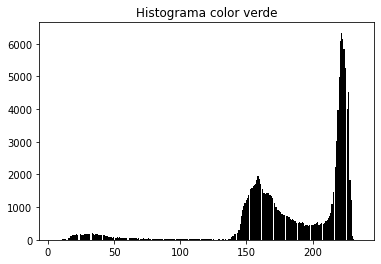

In [37]:
plt.hist(img[:,:,1].flatten(), bins=255, color='black')
plt.title("Histograma color verde")
plt.show()

In [38]:
pos = lambda x : (int(x/360),x%360)
copy_img = img.copy()

In [39]:
gs_img = skimage.color.rgb2gray(img)
tm_img = skimage.filters.threshold_multiotsu(gs_img,3) # seleccionamos tres regiones
regions = np.digitize(gs_img, bins=tm_img) # convertimos la imagen a regiones
rgb_vector = np.reshape(regions,(-1,1))


In [40]:
# Coloreamos cada region en base a su label
for i,e in enumerate(rgb_vector):
    row,col = pos(i)
    if e == 0:
      copy_img[row,col,:] = [0,0,255]
    elif e==1:
      copy_img[row,col,:] = [0,255,0]
    else:
      copy_img[row,col,:] = [255,0,0]

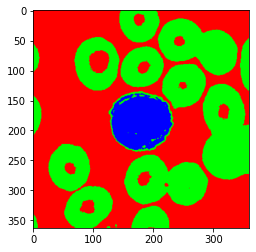

In [41]:
plt.imshow(copy_img)

Sacamos mascaras

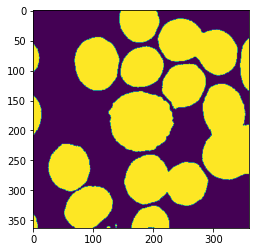

In [42]:
mascara = 1 - (regions ==2)
mascara2 = scipy.ndimage.binary_fill_holes(mascara)
plt.imshow(mascara2)

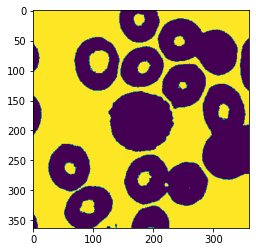

In [43]:
plt.imshow(regions==2)

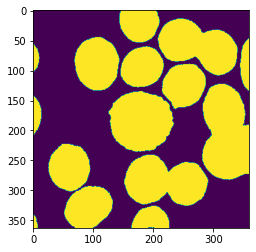

In [44]:
mascara3 = morphology.remove_small_objects(mascara2)
plt.imshow(mascara3)

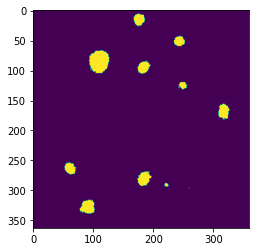

In [45]:
mascara4 = mascara3 & ~mascara
plt.imshow(mascara4)

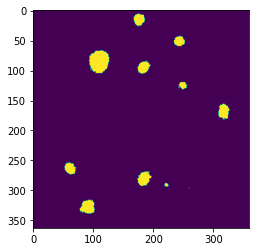

In [48]:
mascara5 = segmentation.clear_border(mascara4)
plt.imshow(mascara5)

Finalmente nos detecta las zonas palidas !

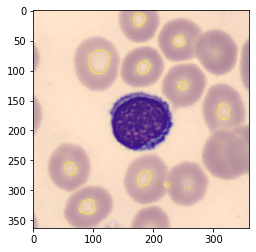

In [49]:
final = skimage.segmentation.mark_boundaries(img,mascara5)
plt.imshow(final)